In [38]:
# Importing dependencies
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## Creating a Function to iterate through 5 stocks 

In [39]:
# list of stocks 
tickers= ['SHOP','KO','MDLZ','AAPL']

In [62]:
# Download historical data for the selected stocks
data = yf.download(tickers, start='2017-01-01', end=datetime.now())['Close']
data.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,KO,MDLZ,SHOP
Date,,,,
2017-01-03,29.037500,41.799999,44.849998,4.282
2017-01-04,29.004999,41.650002,44.799999,4.414
2017-01-05,29.152500,41.750000,45.000000,4.768
2017-01-06,29.477501,41.740002,45.060001,4.690
2017-01-09,29.747499,41.320000,44.689999,4.718


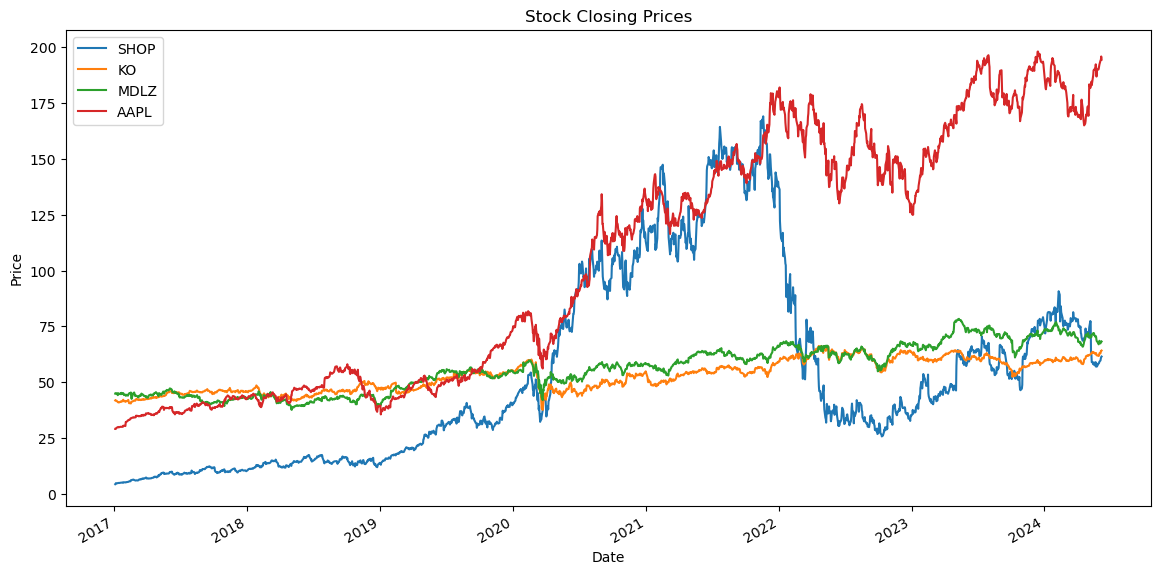

In [63]:
# Plot the closing prices
plt.figure(figsize=(14, 7))
for ticker in tickers:
    data[ticker].plot(label=ticker)
plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [64]:
# Calculate daily returns
# # Daily Return= 
# Price on Day (t−1)
# Price on Day t−Price on Day (t−1)
# ​
returns = data.pct_change()
returns.dropna()

Ticker,AAPL,KO,MDLZ,SHOP
Date,,,,
2017-01-04,-0.001119,-0.003588,-0.001115,0.030827
2017-01-05,0.005085,0.002401,0.004464,0.080199
2017-01-06,0.011148,-0.000239,0.001333,-0.016359
2017-01-09,0.009159,-0.010062,-0.008211,0.005970
2017-01-10,0.001009,-0.006776,-0.011636,0.014625
...,...,...,...,...
2024-05-31,0.005019,0.015491,0.009427,0.010420
2024-06-03,0.009259,0.000000,-0.017219,0.009298
2024-06-04,0.001649,0.016050,0.010987,0.016415


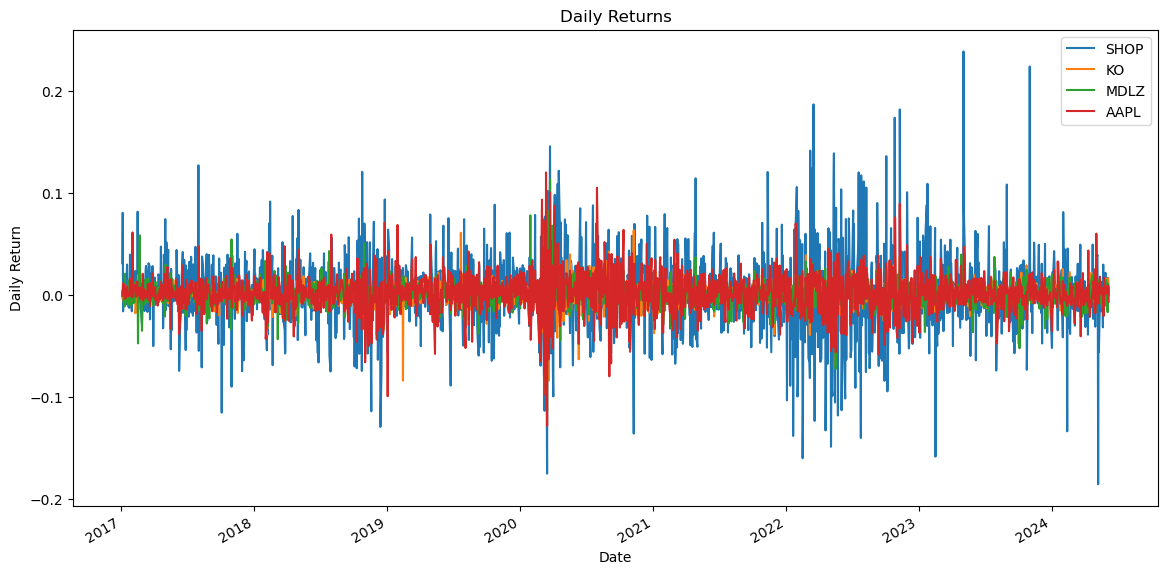

In [65]:
# Plot daily returns
plt.figure(figsize=(14, 7))
for ticker in tickers:
    returns[ticker].plot(label=ticker)
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

In [66]:
# Calculate moving averages
moving_averages = data.rolling(window=30).mean()
moving_averages.dropna()

Ticker,AAPL,KO,MDLZ,SHOP
Date,,,,
2017-02-14,30.870583,41.382334,44.654333,5.042933
2017-02-15,31.031916,41.337000,44.671667,5.102233
2017-02-16,31.193000,41.322000,44.618333,5.158333
2017-02-17,31.352250,41.304667,44.535000,5.204467
2017-02-21,31.508833,41.295334,44.532000,5.258400
...,...,...,...,...
2024-05-31,181.602333,62.246667,70.196000,64.728667
2024-06-03,182.570000,62.338667,70.170667,64.396334
2024-06-04,183.520333,62.451667,70.126667,64.067334


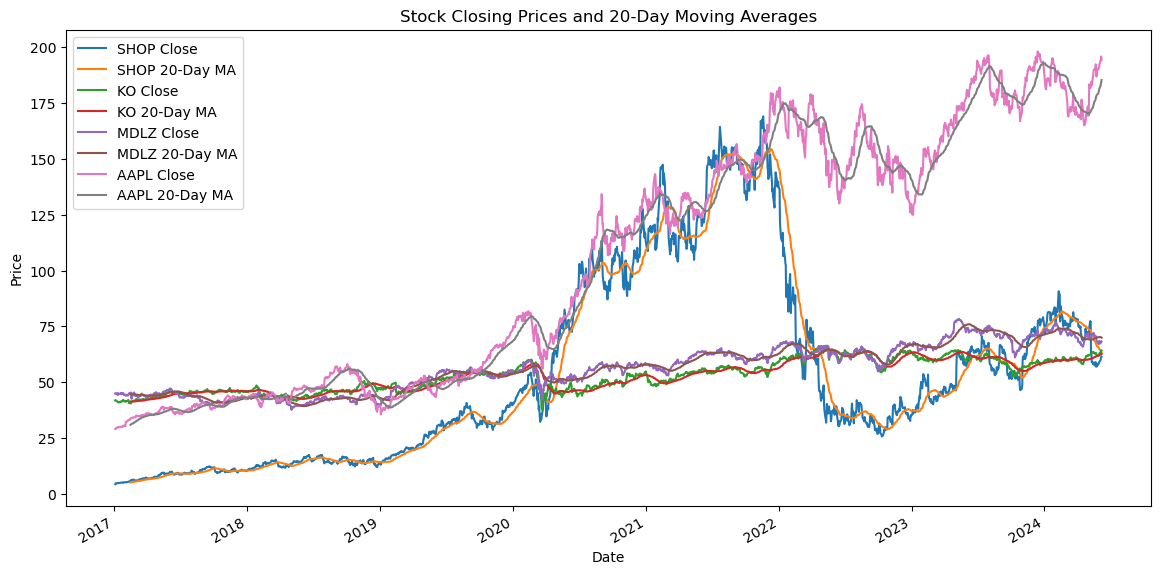

In [67]:
# Plot moving averages
plt.figure(figsize=(14, 7))
for ticker in tickers:
    data[ticker].plot(label=f'{ticker} Close')
    moving_averages[ticker].plot(label=f'{ticker} 20-Day MA')
plt.title('Stock Closing Prices and 20-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

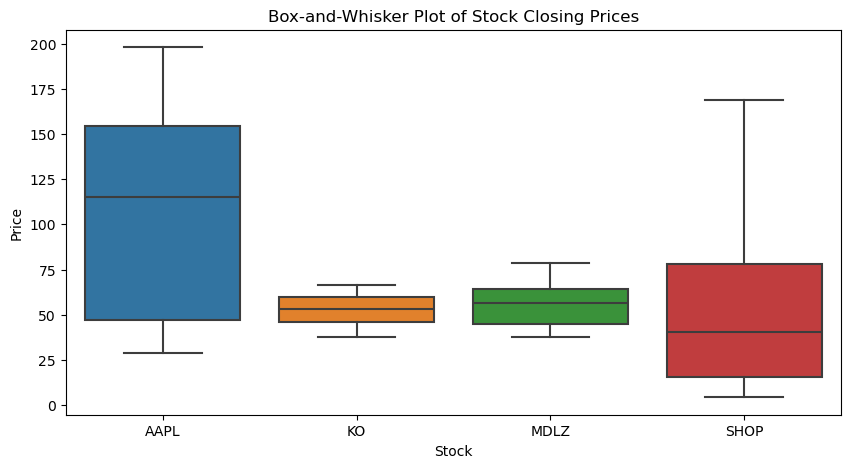

In [68]:
# Create box-and-whisker plots for closing prices
plt.figure(figsize=(10, 5))
sns.boxplot(data=data)
plt.title('Box-and-Whisker Plot of Stock Closing Prices')
plt.xlabel('Stock')
plt.ylabel('Price')
plt.show()

[*********************100%%**********************]  1 of 1 completed


SHOP Mean Squared Error: 6.715970732551818


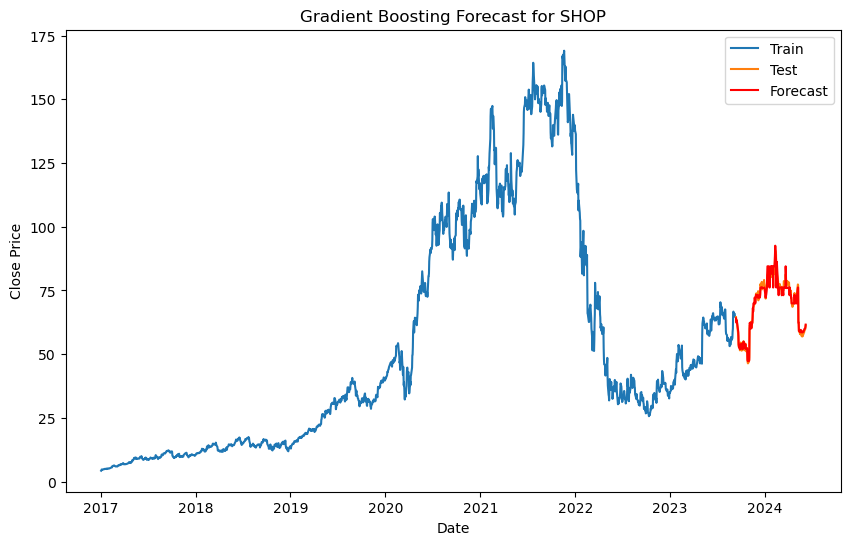

[*********************100%%**********************]  1 of 1 completed


KO Mean Squared Error: 0.29975510281359635


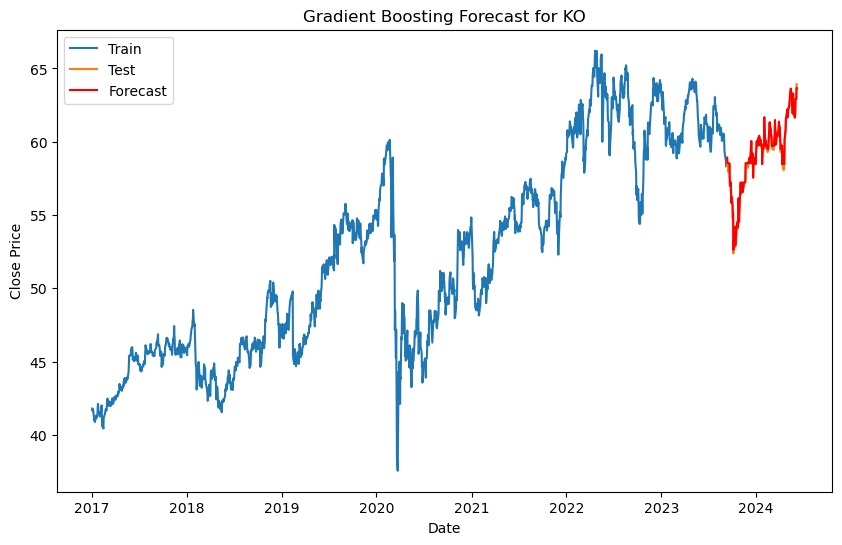

[*********************100%%**********************]  1 of 1 completed


MDLZ Mean Squared Error: 0.7777326190791148


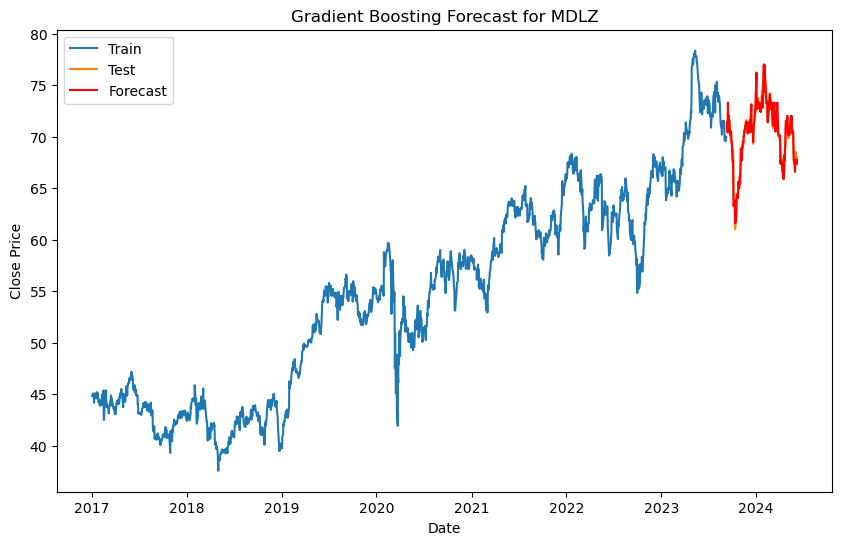

[*********************100%%**********************]  1 of 1 completed


AAPL Mean Squared Error: 8.630720187491898


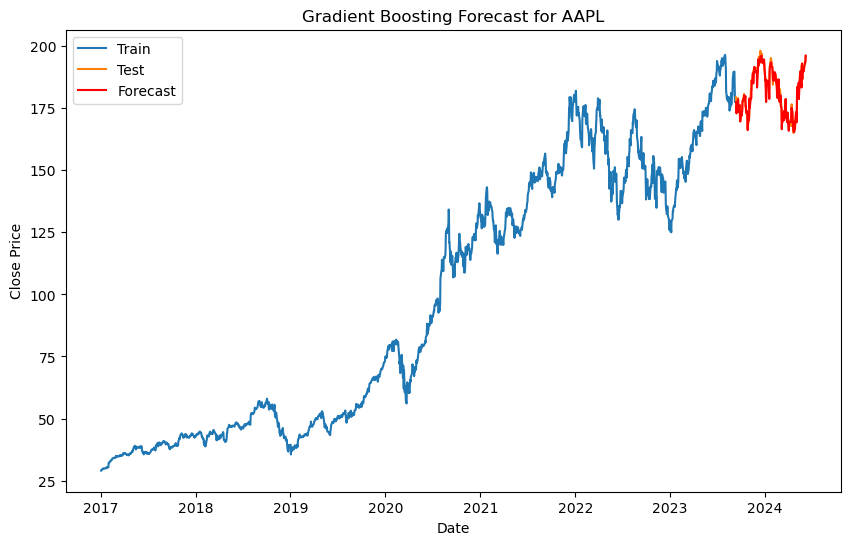

In [69]:
# creating a function to iterate through each stock and plot a predictive graph
start_date = '2017-01-01'
end_date= datetime.now()

def get_stock_data(tickers):
    stock_data = yf.download(tickers, start_date, end_date)
    stock_data = stock_data[['Close']]
    stock_data.sort_index(inplace=True)
    return stock_data

def split(stock_data):
    split_index = int(len(stock_data) * 0.9)
    train_stocks = stock_data[:split_index]
    test_stocks = stock_data[split_index:]
    return test_stocks, train_stocks

def train_model(test_stocks, train_stocks):
    train_stocks['Target'] = train_stocks['Close'].shift(-1)
    test_stocks['Target'] = test_stocks['Close'].shift(-1)
    train_stocks.dropna(inplace=True)
    test_stocks.dropna(inplace=True)

    X_train_stocks = train_stocks[['Close']]
    y_train_stocks = train_stocks['Target']
    X_test_stocks = test_stocks[['Close']]
    y_test_stocks = test_stocks['Target']

    gbm = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1)
    gbm.fit(X_train_stocks, y_train_stocks)

    return gbm, y_test_stocks, X_test_stocks, y_train_stocks, X_train_stocks

def test_model(gbm, X_test_stocks, y_test_stocks, train_stocks, test_stocks, ticker):
    y_pred_stocks = gbm.predict(X_test_stocks)
    mse = mean_squared_error(y_test_stocks, y_pred_stocks)
    print(f"{ticker} Mean Squared Error: {mse}")

    plt.figure(figsize=(10, 6))
    plt.plot(train_stocks.index, train_stocks['Close'], label='Train')
    plt.plot(test_stocks.index, test_stocks['Close'], label='Test')
    plt.plot(test_stocks.index, y_pred_stocks, label='Forecast', color='red')
    plt.title(f'Gradient Boosting Forecast for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# Iterate through the list of tickers
for ticker in tickers:
    stock_data = get_stock_data(ticker)
    test_stocks, train_stocks = split(stock_data)
    gbm, y_test_stocks, X_test_stocks, y_train_stocks, X_train_stocks = train_model(test_stocks, train_stocks)
    test_model(gbm, X_test_stocks, y_test_stocks, train_stocks, test_stocks, ticker)

[*********************100%%**********************]  1 of 1 completed


SHOP Mean Squared Error: 6.715970732551818


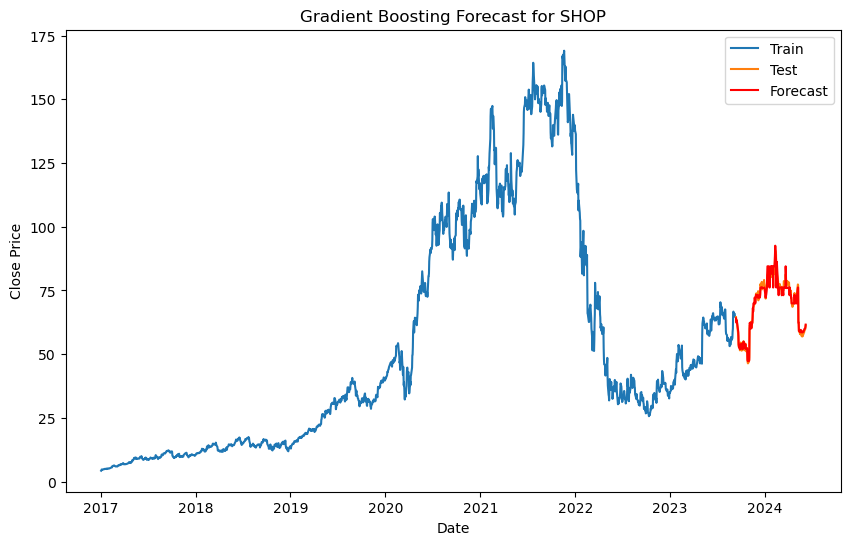

[*********************100%%**********************]  1 of 1 completed


KO Mean Squared Error: 0.29975510281359635


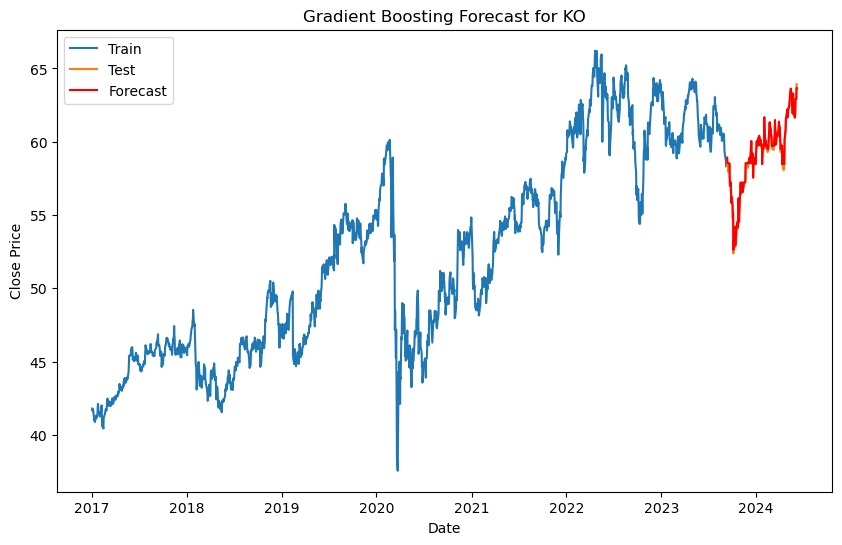

[*********************100%%**********************]  1 of 1 completed


MDLZ Mean Squared Error: 0.7777326190791148


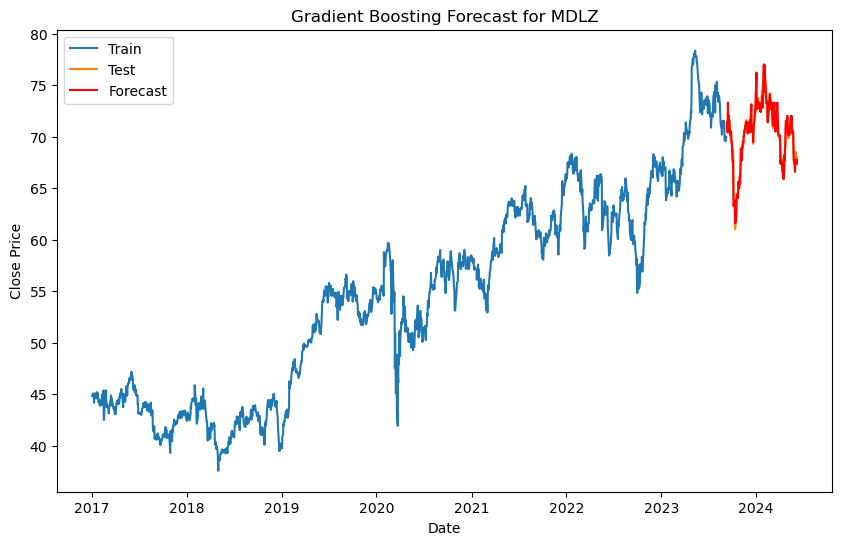

[*********************100%%**********************]  1 of 1 completed


AAPL Mean Squared Error: 8.630720187491898


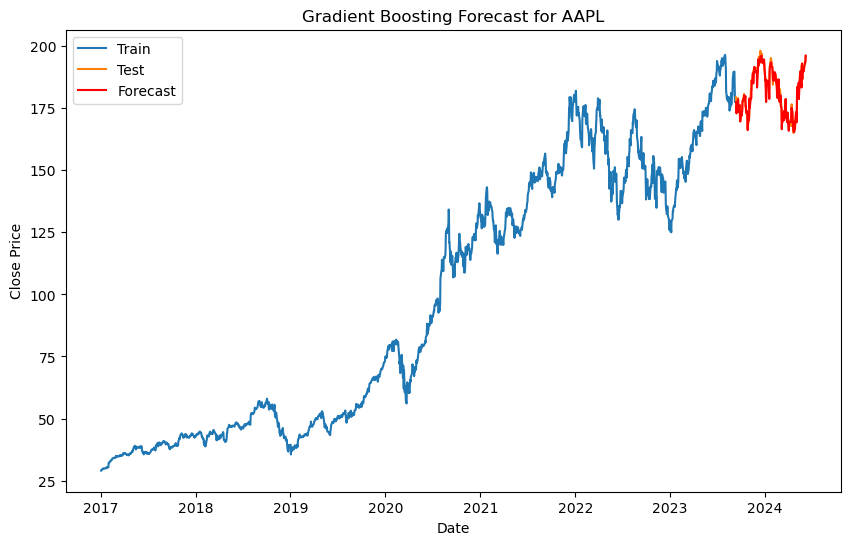

In [70]:
# creating a function to iterate through each stock and plot a predictive graph
start_date = '2017-01-01'
end_date= datetime.now()

def train_model_2(test_stocks, train_stocks):
    train_stocks['Target'] = train_stocks['Close'].shift(-1)
    test_stocks['Target'] = test_stocks['Close'].shift(-1)
    train_stocks.dropna(inplace=True)
    test_stocks.dropna(inplace=True)

    X_train_stocks = train_stocks[['Close']]
    y_train_stocks = train_stocks['Target']
    X_test_stocks = test_stocks[['Close']]
    y_test_stocks = test_stocks['Target']

    gbm = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1)
    gbm.fit(X_train_stocks, y_train_stocks)

    return gbm, y_test_stocks, X_test_stocks, y_train_stocks, X_train_stocks

def test_model_2(gbm, X_test_stocks, y_test_stocks, train_stocks, test_stocks, ticker):
    y_pred_stocks = gbm.predict(X_test_stocks)
    mse = mean_squared_error(y_test_stocks, y_pred_stocks)
    print(f"{ticker} Mean Squared Error: {mse}")

    plt.figure(figsize=(10, 6))
    plt.plot(train_stocks.index, train_stocks['Close'], label='Train')
    plt.plot(test_stocks.index, test_stocks['Close'], label='Test')
    plt.plot(test_stocks.index, y_pred_stocks, label='Forecast', color='red')
    plt.title(f'Gradient Boosting Forecast for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# Iterate through the list of tickers
for ticker in tickers:
    stock_data = get_stock_data(ticker)
    test_stocks, train_stocks = split(stock_data)
    gbm, y_test_stocks, X_test_stocks, y_train_stocks, X_train_stocks = train_model_2(test_stocks, train_stocks)
    test_model_2(gbm, X_test_stocks, y_test_stocks, train_stocks, test_stocks, ticker)